In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from keras.models import Model
from keras.preprocessing import image
%matplotlib inline
import os
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.python.keras.layers import Input, Dense, Flatten, Lambda, Dropout

In [ ]:
# I have already unzipped
!unzip '/content/Hand.zip'

Archive:  /content/Hand.zip
replace Hand/A/A1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pathlib
data_dir = "/content/Hand"

In [ ]:
# ImageDataGenerator
datagen = ImageDataGenerator(
    validation_split=0.2,
         rotation_range=10, # rotation
         width_shift_range=0.2, # horizontal shift
         height_shift_range=0.2, # vertical shift
         zoom_range=0.2, # zoom
         horizontal_flip=True, # horizontal flip
         brightness_range=[0.2,1.2]) # brightness

test_datagen=ImageDataGenerator(validation_split=0.2)
train_ds = datagen.flow_from_directory(data_dir,
                                           class_mode = 'categorical',
                                           target_size = (180, 180),
                                           batch_size=32,
                                           subset='training',
                                           seed=46)
val_ds = test_datagen.flow_from_directory(data_dir,
                                     class_mode = 'categorical',
                                     target_size = (180, 180),
                                     batch_size=32,
                                     subset='validation',
                                     seed=46)

Found 2400 images belonging to 5 classes.
Found 600 images belonging to 5 classes.


In [ ]:
from tensorflow.keras import backend as K

def f1(y_true, y_pred):
    precision_f = precision(y_true, y_pred)
    recall_f = recall(y_true, y_pred)
    return 2 * ((precision_f * recall_f) / (precision_f + recall_f + K.epsilon()))

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=35,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [ ]:
# Fully Connected Layer
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 26)               13338     
 pper)                                                           
                                                                 
 module_wrapper_9 (ModuleWra  (None, 26)               0         
 pper)                                                

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy', metrics = ['accuracy',f1, precision,recall])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
75/75 [==============================] - 389s 5s/step - loss: 1.0827 - accuracy: 0.6521 - f1: 0.3089 - precision: 0.4584 - recall: 0.2396 - val_loss: 0.4901 - val_accuracy: 0.7800 - val_f1: 0.7278 - val_precision: 0.9770 - val_recall: 0.5844
Epoch 2/5
75/75 [==============================] - 382s 5s/step - loss: 0.5623 - accuracy: 0.7725 - f1: 0.7312 - precision: 0.8557 - recall: 0.6621 - val_loss: 0.5469 - val_accuracy: 0.8000 - val_f1: 0.8165 - val_precision: 0.8337 - val_recall: 0.8004
Epoch 3/5
75/75 [==============================] - 382s 5s/step - loss: 0.4881 - accuracy: 0.7683 - f1: 0.7529 - precision: 0.8105 - recall: 0.7175 - val_loss: 0.5023 - val_accuracy: 0.8200 - val_f1: 0.8161 - val_precision: 0.8211 - val_recall: 0.8114
Epoch 4/5
75/75 [==============================] - 428s 6s/step - loss: 0.4527 - accuracy: 0.8075 - f1: 0.7991 - precision: 0.8162 - recall: 0.7867 - val_loss: 0.3615 - val_accuracy: 0.8750 - val_f1: 0.8771 - val_precision: 0.8891 - val_recall:

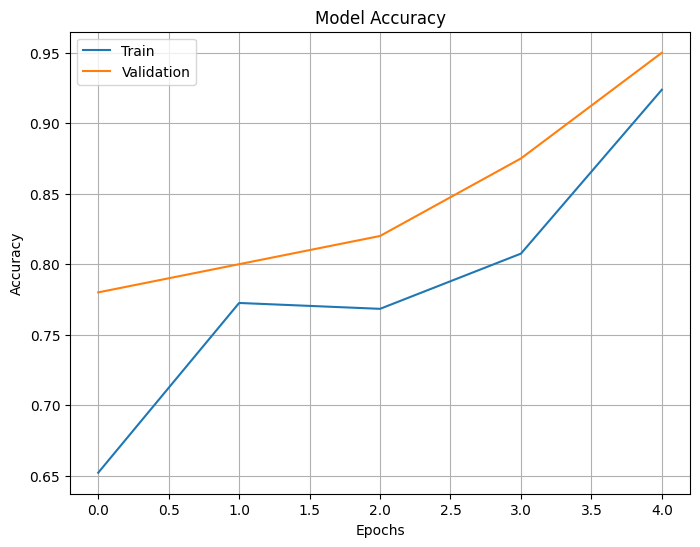

In [ ]:
# Plot Model Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

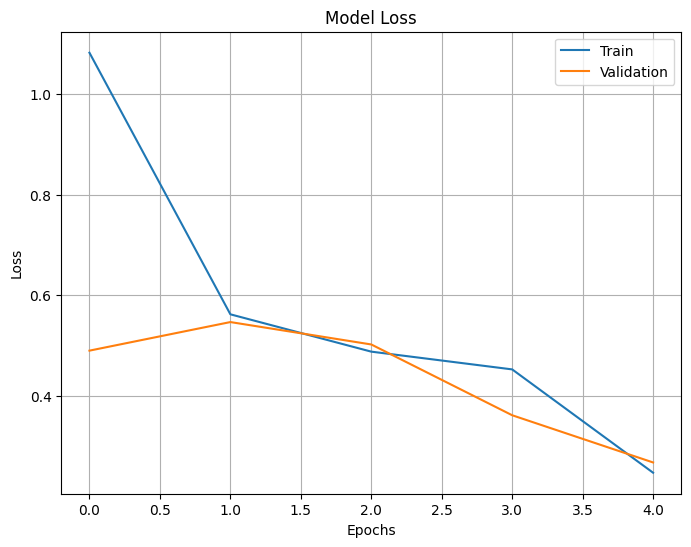

In [ ]:
# Plot Model Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

**Predict Image**


1/1 [==============================] - 40s 40s/step


['D']

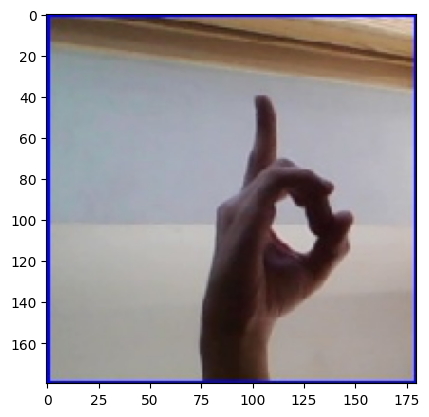

In [ ]:
from tensorflow.keras.preprocessing import image

#Creating a dictionary to map each of the indexes to the corresponding number or letter
from tensorflow.keras.preprocessing import image
dict = {0:"A",1:"B",2:"C",3:"D",4:"E"}


#Predicting images

img = image.load_img("/content/Hand/D/D101.jpg", target_size=(180, 180))
x = image.img_to_array(img)
plt.imshow(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = resnet_model.predict(image, batch_size=64)
label = [np.argmax(i) for i in classes]
pred_class=[dict[x] for x in label]
pred_class

In [ ]:
Y_pred = resnet_model.predict_generator(val_ds)
y_pred = np.argmax(Y_pred, axis=1)

Text(0.5, 36.72222222222221, 'Predicted label')

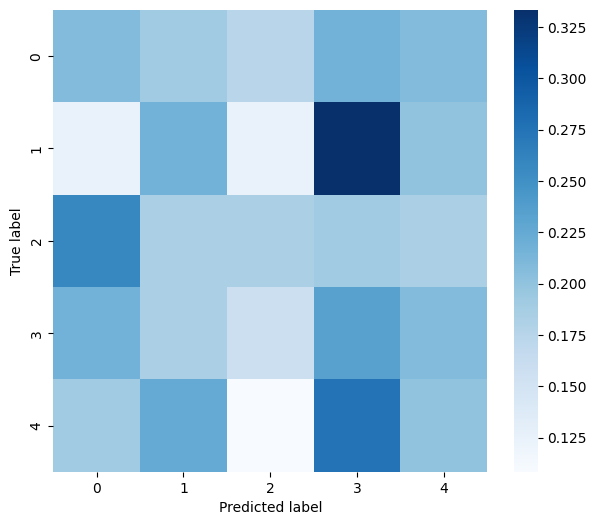

In [ ]:
cf_mat = confusion_matrix(val_ds.classes, y_pred)
cf_mat_normalized = cf_mat.astype('float') / cf_mat.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7, 6))
sns.heatmap(cf_mat_normalized, cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
labels = val_ds.classes

In [ ]:
print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.21      0.21       120
           1       0.22      0.22      0.22       120
           2       0.24      0.18      0.21       120
           3       0.19      0.23      0.21       120
           4       0.20      0.20      0.20       120

    accuracy                           0.21       600
   macro avg       0.21      0.21      0.21       600
weighted avg       0.21      0.21      0.21       600



In [ ]:
loss, accuracy, f1_score, precision, recall = resnet_model.evaluate(val_ds, verbose=0)

In [ ]:
print(f"Test Loss: ", round(loss*100, 3), '%')
print(f"Test Accuracy: ", round(accuracy*100, 3), '%')
print(f"Test Precision: ", round(precision*100, 3), '%')
print(f"Test Recall: ",round(recall*100, 3), '%')
print(f"Test F1 Score: ",round(f1_score*100, 3), '%')

Test Loss:  26.761 %
Test Accuracy:  95.0 %
Test Precision:  95.055 %
Test Recall:  94.572 %
Test F1 Score:  94.807 %
